# Case_01 - Data Base Real Estate - Rio de Janeiro, Brazil

# Analysis Report I

## Imports

In [1]:
import pandas as pd

## Importing Data Base

In [2]:
dataset = pd.read_csv('data/aluguel.csv', sep=';')

In [3]:
dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


### Renaming columns

In [4]:
dataset.rename(columns = {'Tipo': 'Type', 'Bairro': 'District', 'Quartos': 'Bedrooms', 
               'Vagas': 'Parking_spaces', 'Area': 'Area_m²', 
               'Valor': 'Rental', 'Condominio': 'Condominium_fee', 
               'IPTU': 'Urban_tax(IPTU)'}, inplace=True)

In [5]:
dataset

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


## General information about the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             32960 non-null  object 
 1   District         32960 non-null  object 
 2   Bedrooms         32960 non-null  int64  
 3   Parking_spaces   32960 non-null  int64  
 4   Suites           32960 non-null  int64  
 5   Area_m²          32960 non-null  int64  
 6   Rental           32943 non-null  float64
 7   Condominium_fee  28867 non-null  float64
 8   Urban_tax(IPTU)  22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [7]:
dataset.dtypes

Type                object
District            object
Bedrooms             int64
Parking_spaces       int64
Suites               int64
Area_m²              int64
Rental             float64
Condominium_fee    float64
Urban_tax(IPTU)    float64
dtype: object

In [8]:
data_types = pd.DataFrame(dataset.dtypes, columns = ['Data_types'])

In [9]:
data_types.columns.name = 'Variables'

In [10]:
data_types

Variables,Data_types
Type,object
District,object
Bedrooms,int64
Parking_spaces,int64
Suites,int64
Area_m²,int64
Rental,float64
Condominium_fee,float64
Urban_tax(IPTU),float64


In [11]:
dataset.shape

(32960, 9)

In [12]:
print(f'Total of {dataset.shape[0]} properties registered.')

Total of 32960 properties registered.


## Property Types

### Removing repeated data

In [13]:
dataset.head(10)

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [14]:
property_types = dataset['Type']

In [15]:
property_types.drop_duplicates(inplace = True)

In [16]:
property_types.index = range(property_types.shape[0])

In [17]:
property_types = pd.DataFrame(property_types)

In [18]:
property_types.columns.name = 'Id'

In [19]:
property_types

Id,Type
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Analysis Report II

## Selecting Residential Properties Only

In [20]:
dataset = pd.read_csv('data/aluguel.csv', sep=';')

In [21]:
dataset.rename(columns = {'Tipo': 'Type', 'Bairro': 'District', 'Quartos': 'Bedrooms', 
               'Vagas': 'Parking_spaces', 'Area': 'Area_m²', 
               'Valor': 'Rental', 'Condominio': 'Condominium_fee', 
               'IPTU': 'Urban_tax(IPTU)'}, inplace=True)

In [22]:
list(dataset['Type'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [23]:
residential = ['Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila',
 'Studio']

In [24]:
selection = dataset['Type'].isin(residential)
selection

0        False
1         True
2        False
3         True
4         True
         ...  
32955    False
32956     True
32957     True
32958     True
32959    False
Name: Type, Length: 32960, dtype: bool

In [25]:
residential_df = dataset[selection]

In [26]:
residential_df

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [27]:
list(residential_df['Type'].drop_duplicates())

['Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila', 'Studio']

In [85]:
for index, row in residential_df.iterrows():
    
    if row['Type'] == 'Apartamento':
        if row['Area_m²'] > 25:
            residential_df.loc[index, 'Type'] = 'Apartment'
        else:
            residential_df.loc[index, 'Type'] = 'Studio'
        
    if row['Type'] == 'Casa':
        residential_df.loc[index, 'Type'] = 'House'
        
    if row['Type'] == 'Casa de Condomínio':
        residential_df.loc[index, 'Type'] = 'Condominium House'
    
    if row['Type'] == 'Casa de Vila':
        residential_df.loc[index, 'Type'] = 'Village House'

In [29]:
residential_df.index = range(residential_df.shape[0])

In [30]:
residential_df

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,House,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
1,Studio,Centro,1,0,0,15,800.0,390.0,20.0
2,Apartment,Higienópolis,1,0,0,48,800.0,230.0,NaN
3,Apartment,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
4,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
21743,Condominium House,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0
21744,Apartment,Méier,2,0,0,70,900.0,490.0,48.0
21745,Apartment,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
21746,Apartment,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [31]:
print(f'Total of {residential_df.shape[0]} residential properties registered.')

Total of 21748 residential properties registered.


## Exporting Residential Data Base

In [32]:
residential_df.to_csv('data/residential_rental.csv', sep=';', index=False)

In [33]:
residential_df_raw = pd.read_csv('data/residential_rental.csv', sep=';')

In [34]:
residential_df_raw

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,House,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
1,Studio,Centro,1,0,0,15,800.0,390.0,20.0
2,Apartment,Higienópolis,1,0,0,48,800.0,230.0,NaN
3,Apartment,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
4,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
21743,Condominium House,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0
21744,Apartment,Méier,2,0,0,70,900.0,490.0,48.0
21745,Apartment,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
21746,Apartment,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Analysis Report III

## Handling missing data

In [35]:
residential_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21748 entries, 0 to 21747
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             21748 non-null  object 
 1   District         21748 non-null  object 
 2   Bedrooms         21748 non-null  int64  
 3   Parking_spaces   21748 non-null  int64  
 4   Suites           21748 non-null  int64  
 5   Area_m²          21748 non-null  int64  
 6   Rental           21739 non-null  float64
 7   Condominium_fee  19995 non-null  float64
 8   Urban_tax(IPTU)  15259 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ MB


In [36]:
residential_df_raw[residential_df_raw['Rental'].isnull()]

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
55,Apartment,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1435,Apartment,Leme,2,0,0,75,NaN,878.0,NaN
1618,House,Campo Grande,3,4,3,363,NaN,NaN,NaN
1937,Apartment,Botafogo,2,0,0,95,NaN,1010.0,170.0
1959,Apartment,Copacabana,2,0,0,72,NaN,850.0,NaN
4762,House,Campo Grande,3,2,1,100,NaN,NaN,NaN
8254,Apartment,Leme,2,0,1,75,NaN,878.0,NaN
8619,Apartment,Glória,3,0,1,135,NaN,910.0,228.0
8815,Apartment,Gávea,3,1,1,105,NaN,880.0,221.0


### Removing missing data from column 'Rental'

In [37]:
residential_df_raw.dropna(subset = ['Rental'], inplace = True)

In [38]:
residential_df_raw[residential_df_raw['Rental'].isnull()].shape[0]

0

### Removing missing data from column 'Condominium_fee' and 'Urban_tax(IPTU)'

In [39]:
residential_df_raw[residential_df_raw['Condominium_fee'].isnull()].shape[0]

1751

In [40]:
query = (residential_df_raw['Type'] == 'Apartment') & (residential_df_raw['Condominium_fee'].isnull())

In [41]:
x = residential_df_raw.shape[0]
residential_df_raw = residential_df_raw[~query]
y = residential_df_raw.shape[0]
print(f'Total of {x - y} properties removed.')

Total of 720 properties removed.


In [42]:
residential_df_raw[residential_df_raw['Condominium_fee'].isnull()].shape[0]

1031

In [43]:
residential_df_raw = residential_df_raw.fillna({'Condominium_fee': 0, 'Urban_tax(IPTU)': 0})

In [44]:
residential_df_raw[residential_df_raw['Condominium_fee'].isnull()].shape[0]

0

In [45]:
residential_df_raw[residential_df_raw['Urban_tax(IPTU)'].isnull()].shape[0]

0

## Selection of properties of type "Apartment" only.

In [46]:
query = residential_df_raw['Type'] == 'Apartment'
query

0        False
1        False
2         True
4         True
5        False
         ...  
21743    False
21744     True
21745     True
21746     True
21747     True
Name: Type, Length: 21019, dtype: bool

In [47]:
residential_apartments = residential_df_raw[query]

In [48]:
residential_apartments.index = range(residential_apartments.shape[0])

In [49]:
residential_apartments

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,Apartment,Higienópolis,1,0,0,48,800.0,230.0,0.0
1,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0
2,Apartment,Grajaú,2,1,0,70,1500.0,642.0,74.0
3,Apartment,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
4,Apartment,Copacabana,1,0,1,40,2000.0,561.0,50.0
...,...,...,...,...,...,...,...,...,...
18688,Apartment,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18689,Apartment,Méier,2,0,0,70,900.0,490.0,48.0
18690,Apartment,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18691,Apartment,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [50]:
print(f'Total of {residential_apartments.shape[0]} apartments registered.')

Total of 18693 apartments registered.


In [51]:
residential_apartments['Rental'].describe().round()

count      18693.0
mean        4822.0
std        34999.0
min          300.0
25%         1700.0
50%         2800.0
75%         5000.0
max      4500000.0
Name: Rental, dtype: float64

## Selection of properties of type "House", "Condominium House" and "Village House".

In [52]:
residential_df_raw.head(10)

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,House,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
1,Studio,Centro,1,0,0,15,800.0,390.0,20.0
2,Apartment,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Condominium House,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,Condominium House,Ramos,2,2,0,65,1000.0,0.0,0.0
8,Apartment,Grajaú,2,1,0,70,1500.0,642.0,74.0
9,Apartment,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
10,Apartment,Copacabana,1,0,1,40,2000.0,561.0,50.0
11,Apartment,Copacabana,4,3,1,243,13000.0,2000.0,803.0


In [53]:
residential_houses = residential_df_raw.query('Type == "House" or Type == "Condominium House" or Type == "Village House"')

In [54]:
residential_houses.index = range(residential_houses.shape[0])

In [55]:
residential_houses

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,House,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
1,Condominium House,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
2,Condominium House,Ramos,2,2,0,65,1000.0,0.0,0.0
3,Condominium House,Taquara,3,1,1,115,2000.0,0.0,0.0
4,Condominium House,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0
...,...,...,...,...,...,...,...,...,...
2205,Condominium House,Freguesia (Jacarepaguá),3,3,1,155,2000.0,530.0,1250.0
2206,House,Bento Ribeiro,2,1,0,60,1400.0,0.0,0.0
2207,Condominium House,Barra da Tijuca,3,5,3,1000,20000.0,3000.0,0.0
2208,House,Centro,5,0,1,160,5000.0,0.0,80.0


In [56]:
print(f'Total of {residential_houses.shape[0]} houses (including Condominium Houses & Village Houses) registered.')

Total of 2210 houses (including Condominium Houses & Village Houses) registered.


In [57]:
residential_houses['Rental'].describe().round()

count      2210.0
mean       8530.0
std       19190.0
min         380.0
25%        1400.0
50%        4500.0
75%       12000.0
max      800000.0
Name: Rental, dtype: float64

## Selection of properties with areas between 60 and 100 square meters, including the limits.

In [58]:
residential_df_raw.head(10)

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,House,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
1,Studio,Centro,1,0,0,15,800.0,390.0,20.0
2,Apartment,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Condominium House,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,Condominium House,Ramos,2,2,0,65,1000.0,0.0,0.0
8,Apartment,Grajaú,2,1,0,70,1500.0,642.0,74.0
9,Apartment,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
10,Apartment,Copacabana,1,0,1,40,2000.0,561.0,50.0
11,Apartment,Copacabana,4,3,1,243,13000.0,2000.0,803.0


In [59]:
query = (residential_df_raw['Area_m²'] >= 60) & (residential_df_raw['Area_m²'] <= 100)

In [60]:
residential_area_m2 = residential_df_raw[query]

In [61]:
residential_area_m2

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,House,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
6,Condominium House,Ramos,2,2,0,65,1000.0,0.0,0.0
8,Apartment,Grajaú,2,1,0,70,1500.0,642.0,74.0
9,Apartment,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
14,Apartment,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0
...,...,...,...,...,...,...,...,...,...
21738,Apartment,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0
21739,Apartment,Leblon,3,0,1,80,3000.0,1010.0,249.0
21744,Apartment,Méier,2,0,0,70,900.0,490.0,48.0
21745,Apartment,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [62]:
print(f'Total of {residential_area_m2.shape[0]} properties (including Apartments, Houses, Condominium Houses & Village Houses) registered.')

Total of 8418 properties (including Apartments, Houses, Condominium Houses & Village Houses) registered.


## Selection of properties with at least 4 bedrooms and rent value below 2000.00.

In [63]:
query = (residential_df_raw['Bedrooms'] >= 4) & (residential_df_raw['Rental'] < 2000.00)

In [64]:
residential_4_beds = residential_df_raw[query]

In [65]:
residential_4_beds.index = range(residential_4_beds.shape[0])

In [66]:
residential_4_beds

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,Apartment,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,0.0
1,House,Campo Grande,4,1,4,100,1600.0,0.0,0.0
2,House,Engenho de Dentro,4,3,0,120,1500.0,0.0,0.0
3,Village House,Méier,4,0,1,85,1600.0,0.0,0.0
4,House,Campo Grande,4,1,0,140,1700.0,0.0,0.0
5,Apartment,Campo Grande,4,2,1,115,1900.0,500.0,0.0
6,Apartment,Recreio dos Bandeirantes,4,2,1,105,1900.0,1492.0,205.0
7,Apartment,Pechincha,4,1,2,178,1900.0,1100.0,270.0
8,House,Riachuelo,4,0,1,100,1800.0,0.0,40.0
9,House,Méier,4,1,1,125,1900.0,0.0,0.0


In [67]:
print(f'Total of {residential_4_beds.shape[0]} properties with at least 4 bedrooms and rent value below 2000.00')

Total of 36 properties with at least 4 bedrooms and rent value below 2000.00


## Selection of properties called Studio.

In [68]:
query = residential_df_raw['Type'] == 'Studio'

In [69]:
studio = residential_df_raw[query]

In [70]:
studio.index = range(studio.shape[0])

In [71]:
studio

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,Studio,Centro,1,0,0,15,800.0,390.0,20.0
1,Studio,Botafogo,1,0,0,17,1100.0,330.0,15.0
2,Studio,Santa Teresa,1,0,0,21,800.0,312.0,15.0
3,Studio,Benfica,1,0,0,15,350.0,0.0,0.0
4,Studio,Copacabana,1,0,0,25,2000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
111,Studio,Portuguesa,1,0,0,16,1200.0,0.0,0.0
112,Studio,Botafogo,1,0,0,24,2200.0,0.0,0.0
113,Studio,Copacabana,1,0,0,25,1600.0,400.0,20.0
114,Studio,Centro,1,0,0,25,1300.0,280.0,30.0


In [72]:
studio['Rental'].describe().round()

count     116.0
mean     1295.0
std       733.0
min       100.0
25%       888.0
50%      1200.0
75%      1500.0
max      5000.0
Name: Rental, dtype: float64

In [74]:
residential_df_raw

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,House,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
1,Studio,Centro,1,0,0,15,800.0,390.0,20.0
2,Apartment,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Condominium House,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
21743,Condominium House,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0
21744,Apartment,Méier,2,0,0,70,900.0,490.0,48.0
21745,Apartment,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
21746,Apartment,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [75]:
residential_df_raw.to_csv('data/residential_rental.csv', sep=';', index=False)

# Creating new variables

### Creating the variable "Gross_Amount" to show how much the tenant will pay at the total.

In [76]:
residential_df = pd.read_csv('data/residential_rental.csv', sep = ';')

In [77]:
residential_df.head(10)

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU)
0,House,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
1,Studio,Centro,1,0,0,15,800.0,390.0,20.0
2,Apartment,Higienópolis,1,0,0,48,800.0,230.0,0.0
3,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0
4,Condominium House,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
5,Condominium House,Ramos,2,2,0,65,1000.0,0.0,0.0
6,Apartment,Grajaú,2,1,0,70,1500.0,642.0,74.0
7,Apartment,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
8,Apartment,Copacabana,1,0,1,40,2000.0,561.0,50.0
9,Apartment,Copacabana,4,3,1,243,13000.0,2000.0,803.0


In [78]:
residential_df['Gross_Amount'] = residential_df['Rental'] + residential_df['Condominium_fee'] + residential_df['Urban_tax(IPTU)']

In [79]:
residential_df.head(10)

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU),Gross_Amount
0,House,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
1,Studio,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
2,Apartment,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
3,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
4,Condominium House,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
5,Condominium House,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
6,Apartment,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
7,Apartment,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
8,Apartment,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0
9,Apartment,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0


### Creating the variable "per_m²" to show how much the tenant will per square metre.

In [80]:
residential_df['per_m²'] = (residential_df['Rental'] / residential_df['Area_m²']).round(2)

In [81]:
residential_df.head(10)

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU),Gross_Amount,per_m²
0,House,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
1,Studio,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
2,Apartment,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
3,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
4,Condominium House,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33
5,Condominium House,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38
6,Apartment,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43
7,Apartment,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67
8,Apartment,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00
9,Apartment,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0,53.50


### Creating the variable "Property_type" to show the aggregate type for each property.

In [82]:
properties = ['House', 'Condominium House', 'Village House']

In [83]:
residential_df['Property_type'] = residential_df['Type'].apply(lambda x: 'House' if x in properties else 'Apartment')

In [84]:
residential_df.head(10)

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU),Gross_Amount,per_m²,Property_type
0,House,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,House
1,Studio,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,Apartment
2,Apartment,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,Apartment
3,Apartment,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,Apartment
4,Condominium House,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,House
5,Condominium House,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,House
6,Apartment,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,Apartment
7,Apartment,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,Apartment
8,Apartment,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,Apartment
9,Apartment,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0,53.50,Apartment


# Group by

## Analysis Report IV

In [86]:
districts = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']

In [90]:
query = residential_df['District'].isin(districts)
residential_df = residential_df[query]

In [91]:
residential_df['District'].drop_duplicates()

4      Barra da Tijuca
8           Copacabana
13              Tijuca
17             Ipanema
21            Botafogo
25              Leblon
130           Flamengo
Name: District, dtype: object

In [92]:
district_group = residential_df.groupby('District')

In [93]:
district_group

In [94]:
district_group.groups

{'Barra da Tijuca': Int64Index([    4,    12,    14,    19,    27,    29,    32,    39,    40,
                57,
             ...
             20964, 20966, 20969, 20977, 20995, 20996, 21006, 21007, 21008,
             21014],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   21,    45,    81,    82,   104,   112,   119,   126,   185,
               189,
             ...
             20671, 20687, 20699, 20729, 20853, 20859, 20865, 20912, 20942,
             20985],
            dtype='int64', length=802),
 'Copacabana': Int64Index([    8,     9,    22,    23,    28,    85,    97,   102,   117,
               121,
             ...
             20889, 20904, 20910, 20932, 20939, 20975, 20978, 20990, 21004,
             21005],
            dtype='int64', length=2362),
 'Flamengo': Int64Index([  130,   206,   270,   305,   329,   337,   342,   350,   374,
               402,
             ...
             20669, 20727, 20760, 20781, 20829, 20879, 20901, 20927, 20936,
  

### Average rental price per district.

In [101]:
district_group[['Rental']].mean().round(2)

,Rental
District,
Barra da Tijuca,7069.63
Botafogo,9461.87
Copacabana,4443.92
Flamengo,4439.01
Ipanema,9461.32
Leblon,8861.53
Tijuca,2061.24


# Descriptive statistics

In [104]:
district_group['Rental'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
District,,,,,,,,
Barra da Tijuca,3863.0,7069.63,11874.17,100.0,2500.0,4500.0,8500.0,600000.0
Botafogo,802.0,9461.87,158787.30,700.0,2400.0,3200.0,4500.0,4500000.0
Copacabana,2362.0,4443.92,3690.58,100.0,2300.0,3300.0,5000.0,35000.0
Flamengo,639.0,4439.01,3930.17,800.0,2200.0,3000.0,5200.0,35000.0
Ipanema,1738.0,9461.32,8230.85,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1237.0,8861.53,7006.59,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1080.0,2061.24,1674.29,750.0,1500.0,1800.0,2300.0,45000.0


In [105]:
district_group['Rental'].aggregate(['min', 'max'])

,min,max
District,,
Barra da Tijuca,100.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Average rental amount per district')

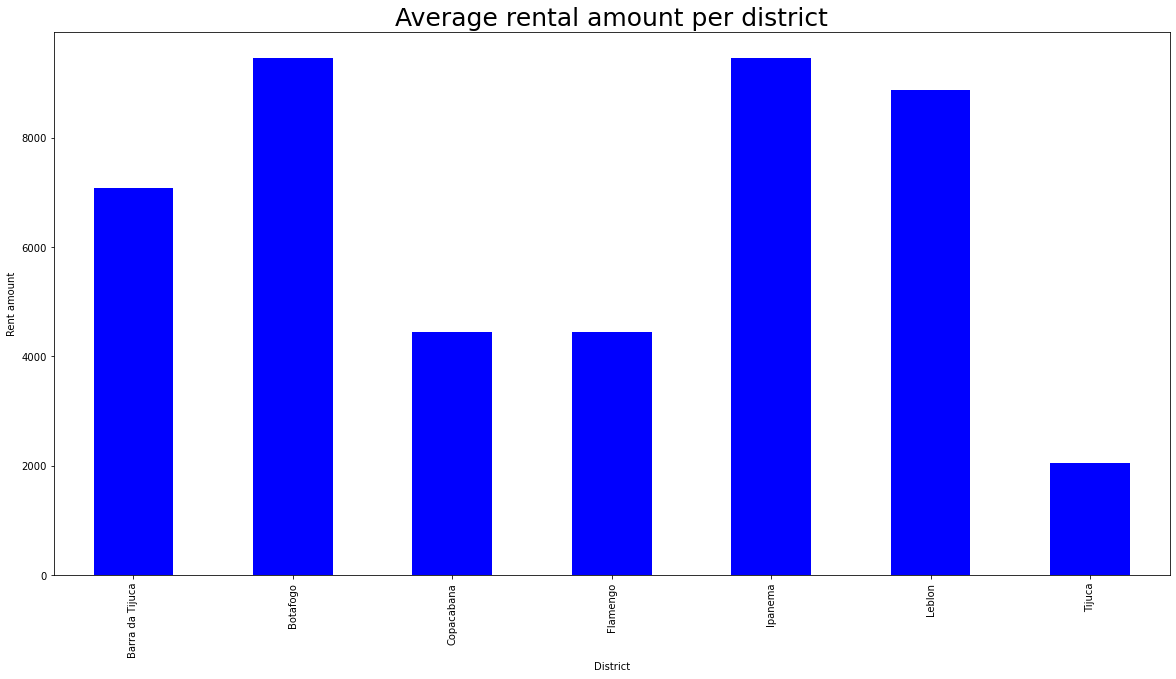

In [112]:
fig = district_group['Rental'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Rent amount')
fig.set_title('Average rental amount per district', {'fontsize': 25})

Text(0.5, 1.0, 'Standard Deviation')

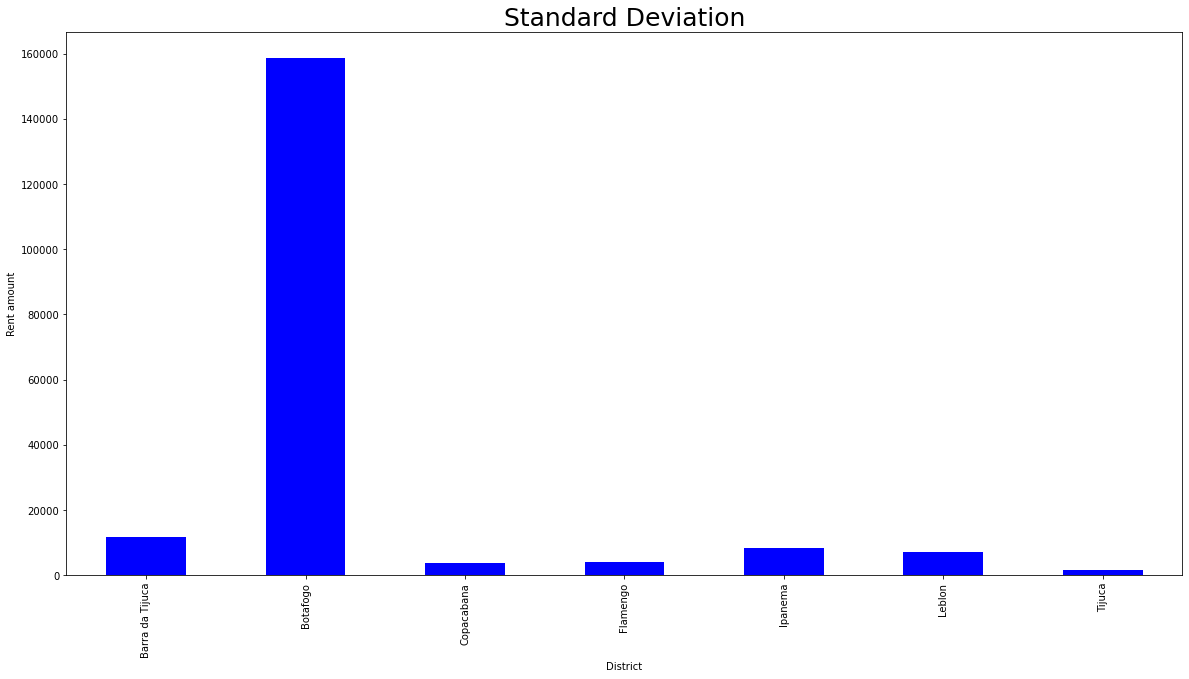

In [114]:
fig = district_group['Rental'].std().plot.bar(color = 'blue')
fig.set_ylabel('Rent amount')
fig.set_title('Standard Deviation', {'fontsize': 25})

# Identifying and removing Outliers

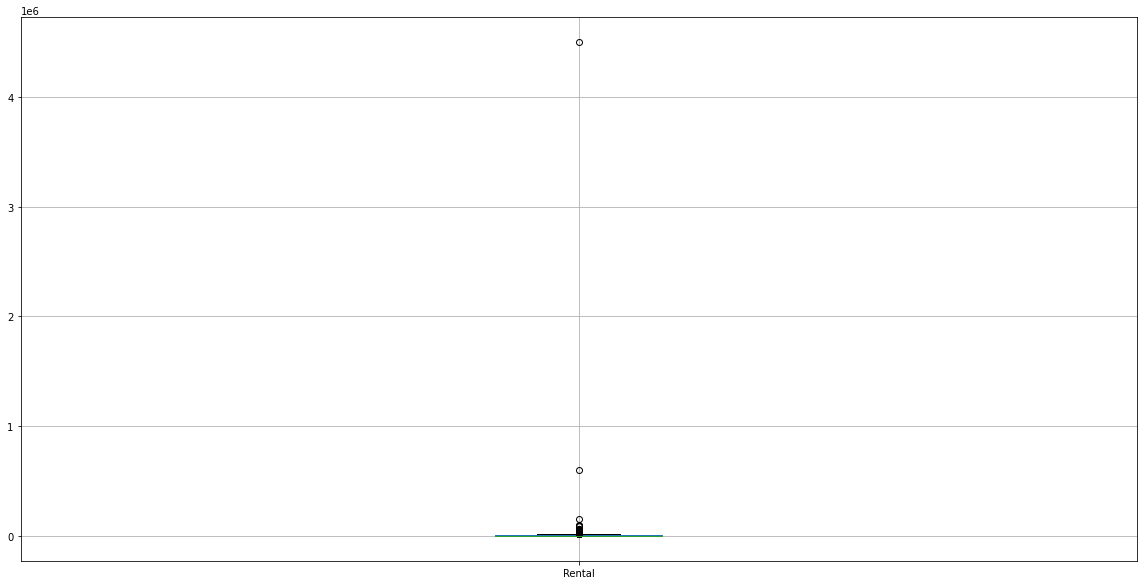

In [116]:
residential_df.boxplot(['Rental'])

In [118]:
residential_df[residential_df['Rental'] >= 500000]

,Type,District,Bedrooms,Parking_spaces,Suites,Area_m²,Rental,Condominium_fee,Urban_tax(IPTU),Gross_Amount,per_m²,Property_type
7354,Apartment,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,601100.0,9230.77,Apartment
14962,Apartment,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,15000.00,Apartment


In [119]:
value = residential_df['Rental']

<img src="boxplot.png" width=70%>

In [122]:
Q1 = value.quantile(.25)
Q3 = value.quantile(.75)
IQR = Q3 - Q1
MINIMUM = Q1 - 1.5 * IQR
MAXIMUM = Q3 + 1.5 * IQR

In [123]:
query = (value >= MINIMUM) & (value <= MAXIMUM)
new_residential_df = residential_df[query]

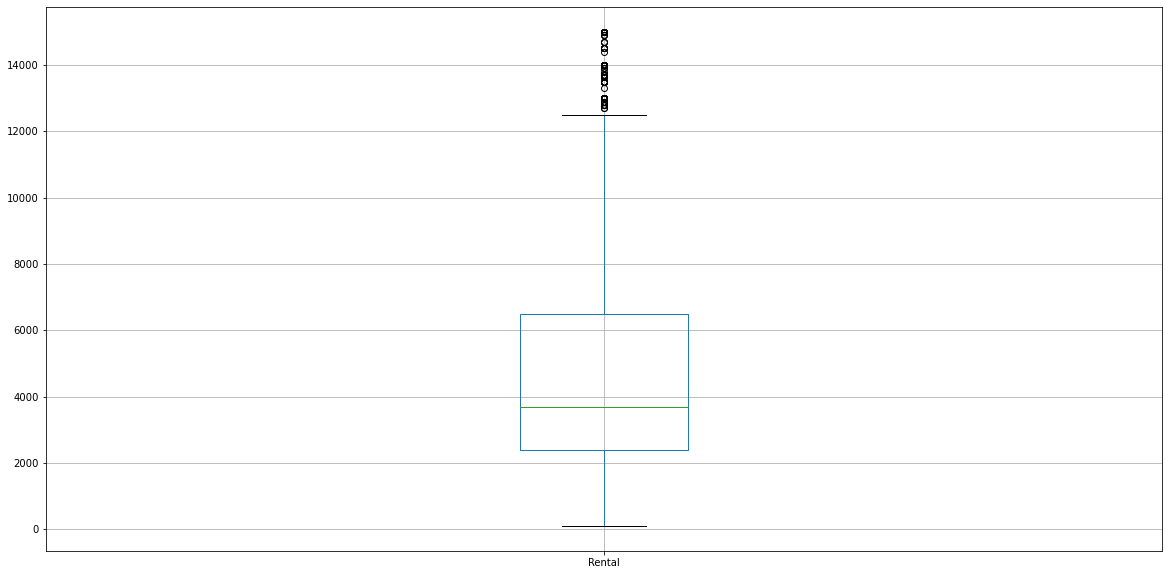

In [126]:
new_residential_df.boxplot(['Rental'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedd7763850>]],
      dtype=object)

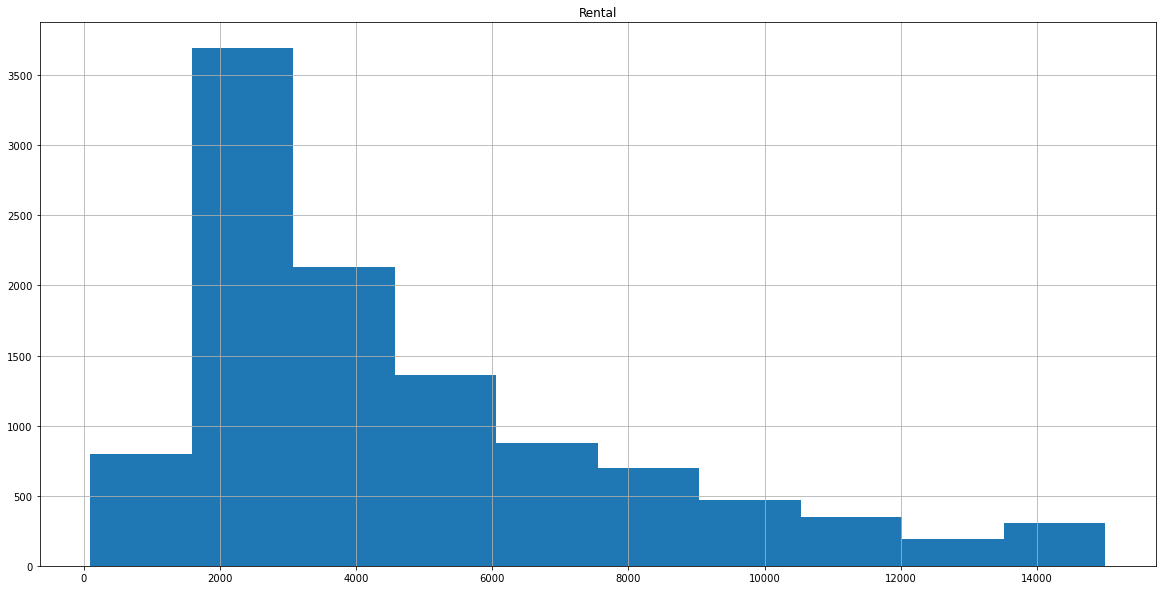

In [127]:
new_residential_df.hist(['Rental'])

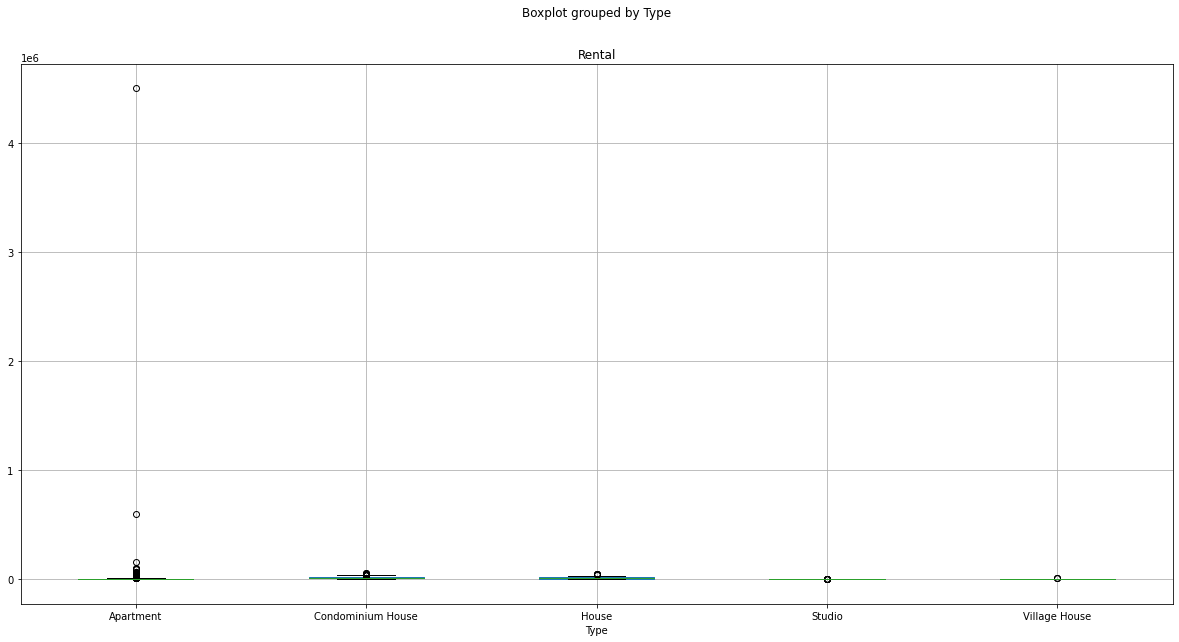

In [129]:
residential_df.boxplot(['Rental'], by = 'Type')

In [130]:
type_group = residential_df.groupby('Type')['Rental']

In [131]:
type_group.groups

{'Apartment': Int64Index([    8,     9,    12,    13,    16,    17,    18,    19,    21,
                22,
             ...
             21003, 21004, 21005, 21006, 21007, 21008, 21010, 21011, 21012,
             21018],
            dtype='int64', length=10990),
 'Condominium House': Int64Index([    4,    14,    39,   157,   195,   245,   251,   277,   293,
               319,
             ...
             20888, 20890, 20908, 20916, 20947, 20958, 20959, 20977, 20996,
             21014],
            dtype='int64', length=515),
 'House': Int64Index([  170,   317,   487,   518,   605,   610,   649,   693,   828,
              1136,
             ...
             19119, 19160, 19530, 19561, 19663, 20017, 20258, 20299, 20409,
             20766],
            dtype='int64', length=123),
 'Studio': Int64Index([  396,   851,  1236,  1556,  2569,  2846,  3895,  4125,  4551,
              4587,  4745,  5273,  5344,  5883,  6066,  6911,  7014,  7531,
              7532,  7750,  8123,  8291,  8

In [132]:
Q1 = type_group.quantile(.25)
Q3 = type_group.quantile(.75)
IQR = Q3 - Q1
MINIMUM = Q1 - 1.5 * IQR
MAXIMUM = Q3 + 1.5 * IQR

In [133]:
new_df = pd.DataFrame()

for each_type in type_group.groups.keys():
    is_type = residential_df['Type'] == each_type
    is_in_limit = (residential_df['Rental'] >= MINIMUM[each_type]) & (residential_df['Rental'] <= MAXIMUM[each_type])
    query = is_type & is_in_limit
    data_query = residential_df[query]
    new_df = pd.concat([new_df, data_query])

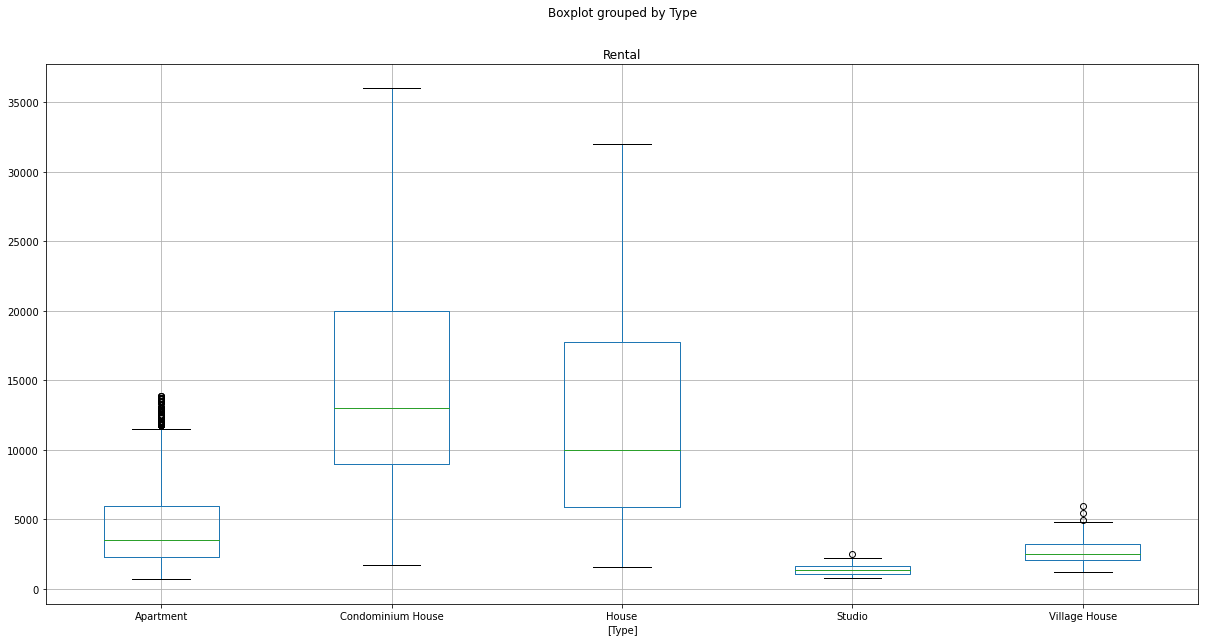

In [135]:
new_df.boxplot(['Rental'], by = ['Type'])

In [136]:
new_df.to_csv('data/residential_rental_no_outliers.csv', sep=';', index = False)